In [3]:
!git clone https://github.com/ndb796/bing_image_downloader

Cloning into 'bing_image_downloader'...


In [1]:
import os 
import shutil

directory_list = [
    '../dataset/train/',
    '../dataset/test/',
]

for dir in directory_list:
    os.makedirs(dir)

In [2]:
from bing_image_downloader.bing_image_downloader import downloader

downloader.download(query= '마동석', limit= 50, output_dir= './', adult_filter_off= True, force_replace= False, timeout= 60)
downloader.download(query= '카리나', limit= 50, output_dir= './', adult_filter_off= True, force_replace= False, timeout= 60)
downloader.download(query= '이수지', limit= 50, output_dir= './', adult_filter_off= True, force_replace= False, timeout= 60)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://image.xportsnews.com/contents/images/upload/article/2022/1128/1669621507974521.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://image.ytn.co.kr/osen/2019/11/6e8ef36b-36c7-4d1c-896f-19499d54ca7d.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://entertainimg.kbsmedia.co.kr/cms/uploads/PERSON_20240206075441_1b54f931528a9d36c98db236a5e19d74.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://img.hankyung.com/photo/201804/03.16364689.1.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://img.hankyung.com/photo/201709/01.14677695.1.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://image.edaily.co.kr/images/photo/files/NP/S/2023/05/PS23050300369.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://img.extmovie.com/files/attach/images/135/397/529/075/7edeef3b18761bda9bb70af3152bd379.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2019/05/14/5tjArQ2TYQ7Y636934517816837543.jpg)
#8 파일 다운로드가 완료되었습

In [3]:
os.listdir('카리나')

['image_1.jpg',
 'image_10.jpg',
 'image_11.jpg',
 'image_12.jpg',
 'image_13.jpg',
 'image_14.jpg',
 'image_15.jpeg',
 'image_16.jpg',
 'image_17.jpg',
 'image_18.jpeg',
 'image_19.jpg',
 'image_2.jpg',
 'image_20.jpg',
 'image_21.jpg',
 'image_22.jpg',
 'image_23.jpg',
 'image_24.jpg',
 'image_25.jpg',
 'image_26.jpg',
 'image_27.jpg',
 'image_28.jpg',
 'image_29.png',
 'image_3.jpg',
 'image_30.jpg',
 'image_31.jpg',
 'image_32.png',
 'image_33.jpg',
 'image_34.jpg',
 'image_35.jpg',
 'image_36.jpg',
 'image_37.jpg',
 'image_38.jpg',
 'image_39.jpg',
 'image_4.jpg',
 'image_40.jpg',
 'image_41.jpg',
 'image_42.jpg',
 'image_43.jpg',
 'image_44.jpg',
 'image_45.jpg',
 'image_46.jpg',
 'image_47.jpg',
 'image_48.jpg',
 'image_49.jpg',
 'image_5.jpg',
 'image_50.jpg',
 'image_6.jpeg',
 'image_7.jpg',
 'image_8.jpg',
 'image_9.jpg']

In [17]:
def dataset_split(query, train_cnt):        # 카리나 , 30
    for dir in directory_list:      # dir변수에는 directory_list 경로가 들어있다. 
        if not os.path.isdir(dir +'/'+ query):      # dir변수 경로에 query명 폴더가 없으면
            os.makedirs(dir + query)        # dir변수 경로에 query명 폴더를 만들어라.

    cnt = 0

    for file_name in os.listdir(query):
        if cnt < train_cnt:
            shutil.move(query + '/' + file_name, '../dataset/train/' + query + '/' + file_name)
        else: 
            shutil.move(query + '/' + file_name, '../dataset/test/' + query + '/' + file_name)

        cnt += 1

    shutil.rmtree(query)

dataset_split('카리나', 40)
dataset_split('마동석', 40)
dataset_split('이수지', 40)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import time

In [9]:
transforms_train = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(p= 0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

transforms_test = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)

train_datasets = datasets.ImageFolder(root= '../dataset/train', transform= transforms_train)
test_datasets = datasets.ImageFolder(root= '../dataset/test', transform= transforms_test)

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '../dataset/train'

In [39]:
train_datasets

Dataset ImageFolder
    Number of datapoints: 119
    Root location: ../dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [10]:
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size= 4, shuffle= True)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size= 4, shuffle= True)

NameError: name 'train_datasets' is not defined

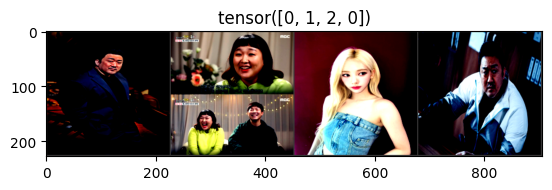

In [50]:
import matplotlib.pyplot as plt

def imshow(img, title):
    img = img.numpy().transpose([1, 2, 0])      # RGB 순서를 바꿔준다.

    mean = np.array([0.229, 0.224, 0.225])
    std = np.array([0.485, 0.456, 0.406])

    img = std * img + mean
    img = np.clip(img, 0, 1)

    plt.imshow(img)
    plt.title(title)
    plt.show()

images, labels = next(iter(train_dataloader))
images_data = torchvision.utils.make_grid(images)

imshow(images_data, labels)

In [28]:
train_datasets.classes

['마동석', '이수지', '카리나']

In [ ]:
model = models.resnet34(pretrained= True)

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(in_features=512, out_features=3, bias=True)

c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\DL\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [54]:
from tensorboardX import SummaryWriter
import tqdm

writer = SummaryWriter()
optimizer = optim.Adam(model.parameters(), lr= 1e-3)
criterion = nn.CrossEntropyLoss()
epochs = 50
step = 0

device = 'cuda' if torch.cuda.is_available else 'cpu'
model.to(device)

for epoch in range(epochs):
    for data, labels in tqdm.tqdm(train_dataloader):
        optimizer.zero_grad()
        pred = model(data.to(device))
        loss = criterion(pred, labels.to(device))
        writer.add_scalar('Loss/train', loss.item(), step)
        loss.backward()
        optimizer.step()
        step += 1

    print('loss', loss.item())

100%|██████████| 30/30 [00:06<00:00,  4.48it/s]


loss 0.7995091080665588


100%|██████████| 30/30 [00:05<00:00,  5.25it/s]


loss 0.8525589108467102


100%|██████████| 30/30 [00:05<00:00,  5.36it/s]


loss 0.44128862023353577


100%|██████████| 30/30 [00:05<00:00,  5.12it/s]


loss 0.814690887928009


100%|██████████| 30/30 [00:05<00:00,  5.54it/s]


loss 0.7997807860374451


100%|██████████| 30/30 [00:06<00:00,  4.65it/s]


loss 0.3952905833721161


100%|██████████| 30/30 [00:05<00:00,  5.13it/s]


loss 0.34887003898620605


100%|██████████| 30/30 [00:06<00:00,  4.91it/s]


loss 0.3992704451084137


100%|██████████| 30/30 [00:05<00:00,  5.24it/s]


loss 0.46115878224372864


100%|██████████| 30/30 [00:05<00:00,  5.12it/s]


loss 0.7902727127075195


100%|██████████| 30/30 [00:06<00:00,  4.90it/s]


loss 0.6752943396568298


100%|██████████| 30/30 [00:06<00:00,  4.72it/s]


loss 0.35809335112571716


100%|██████████| 30/30 [00:06<00:00,  4.90it/s]


loss 0.7025527358055115


100%|██████████| 30/30 [00:06<00:00,  4.72it/s]


loss 0.10143455862998962


100%|██████████| 30/30 [00:05<00:00,  5.11it/s]


loss 0.17136885225772858


100%|██████████| 30/30 [00:05<00:00,  5.06it/s]


loss 0.4055711030960083


100%|██████████| 30/30 [00:05<00:00,  5.44it/s]


loss 0.5599173903465271


100%|██████████| 30/30 [00:05<00:00,  5.39it/s]


loss 0.09212943911552429


100%|██████████| 30/30 [00:05<00:00,  5.26it/s]


loss 0.392383337020874


100%|██████████| 30/30 [00:06<00:00,  4.96it/s]


loss 0.4578475058078766


100%|██████████| 30/30 [00:05<00:00,  5.04it/s]


loss 0.558210551738739


100%|██████████| 30/30 [00:05<00:00,  5.33it/s]


loss 0.7315614819526672


100%|██████████| 30/30 [00:05<00:00,  5.24it/s]


loss 0.6767951846122742


100%|██████████| 30/30 [00:04<00:00,  6.46it/s]


loss 0.07180549949407578


100%|██████████| 30/30 [00:05<00:00,  5.09it/s]


loss 0.28731846809387207


100%|██████████| 30/30 [00:05<00:00,  5.56it/s]


loss 0.4184499680995941


100%|██████████| 30/30 [00:05<00:00,  5.04it/s]


loss 0.5054371356964111


100%|██████████| 30/30 [00:05<00:00,  5.26it/s]


loss 0.7336623668670654


100%|██████████| 30/30 [00:06<00:00,  4.96it/s]


loss 0.05944645777344704


100%|██████████| 30/30 [00:05<00:00,  5.55it/s]


loss 0.030993804335594177


100%|██████████| 30/30 [00:05<00:00,  5.17it/s]


loss 0.10562003403902054


100%|██████████| 30/30 [00:04<00:00,  6.14it/s]


loss 0.039505913853645325


100%|██████████| 30/30 [00:05<00:00,  5.54it/s]


loss 0.10112354159355164


100%|██████████| 30/30 [00:06<00:00,  4.96it/s]


loss 0.06431324034929276


100%|██████████| 30/30 [00:06<00:00,  4.60it/s]


loss 0.04297681525349617


100%|██████████| 30/30 [00:06<00:00,  4.62it/s]


loss 0.12404351681470871


100%|██████████| 30/30 [00:06<00:00,  4.67it/s]


loss 0.34590044617652893


100%|██████████| 30/30 [00:06<00:00,  4.90it/s]


loss 0.1131829246878624


100%|██████████| 30/30 [00:06<00:00,  4.79it/s]


loss 0.035409290343523026


100%|██████████| 30/30 [00:06<00:00,  4.75it/s]


loss 0.24171680212020874


100%|██████████| 30/30 [00:06<00:00,  4.67it/s]


loss 0.6343573927879333


100%|██████████| 30/30 [00:06<00:00,  4.58it/s]


loss 0.18274807929992676


100%|██████████| 30/30 [00:06<00:00,  4.63it/s]


loss 0.2298271209001541


100%|██████████| 30/30 [00:05<00:00,  5.05it/s]


loss 0.14855796098709106


100%|██████████| 30/30 [00:05<00:00,  5.65it/s]


loss 0.3640943467617035


100%|██████████| 30/30 [00:04<00:00,  6.06it/s]


loss 0.3151405155658722


100%|██████████| 30/30 [00:05<00:00,  5.97it/s]


loss 0.47595059871673584


100%|██████████| 30/30 [00:06<00:00,  4.77it/s]


loss 0.1697649210691452


100%|██████████| 30/30 [00:06<00:00,  4.97it/s]


loss 0.10254178196191788


100%|██████████| 30/30 [00:06<00:00,  4.69it/s]

loss 0.017925670370459557


예측 결과: tensor([0, 2, 1, 1], device='cuda:0'), 정답: tensor([0, 2, 1, 1])


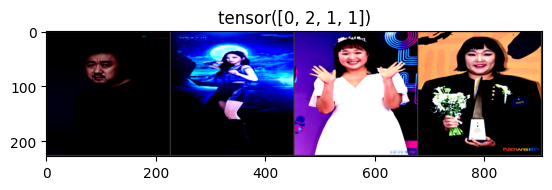

예측 결과: tensor([0, 1, 1, 2], device='cuda:0'), 정답: tensor([0, 1, 1, 2])


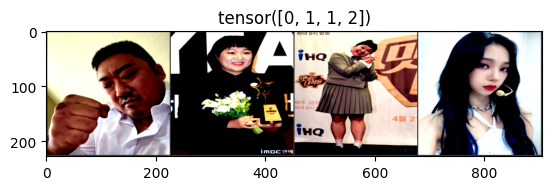

예측 결과: tensor([0, 1, 1, 0], device='cuda:0'), 정답: tensor([2, 1, 1, 0])


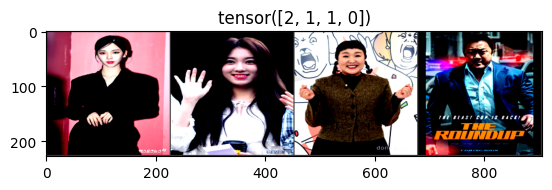

예측 결과: tensor([0, 2, 1, 1], device='cuda:0'), 정답: tensor([0, 2, 1, 1])


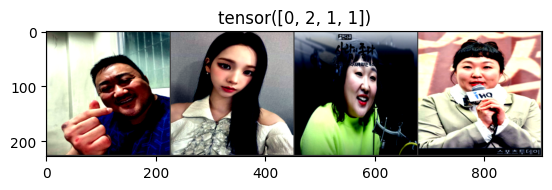

예측 결과: tensor([1, 0, 2, 0], device='cuda:0'), 정답: tensor([1, 0, 2, 0])


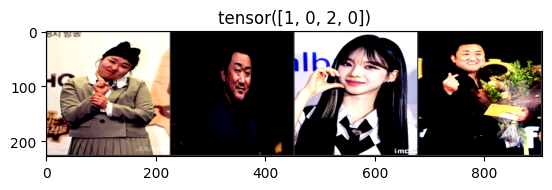

예측 결과: tensor([0, 2, 2, 2], device='cuda:0'), 정답: tensor([0, 2, 2, 2])


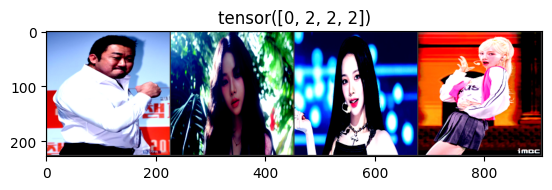

예측 결과: tensor([0, 0, 0, 2], device='cuda:0'), 정답: tensor([0, 0, 0, 2])


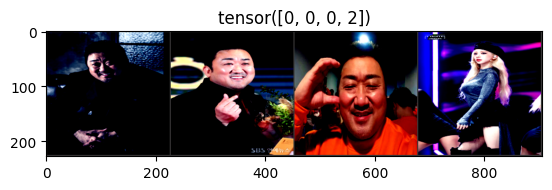

예측 결과: tensor([2], device='cuda:0'), 정답: tensor([2])


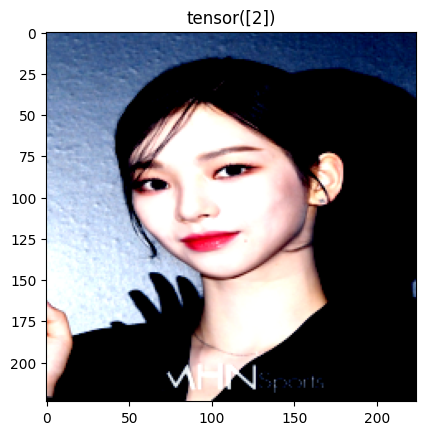

최종 정확도:  tensor([0.1034], device='cuda:0')


In [61]:
model.eval()
with torch.no_grad():
    for data, label in test_dataloader:
        pred = model(data.to(device))
        pred = torch.max(pred, 1)[1]

        total_pred = pred + torch.sum(pred == label.to(device).data)

        print(f'예측 결과: {pred}, 정답: {label}')
        images_data = torchvision.utils.make_grid(data)
        imshow(images_data.to('cpu'), label)

print('최종 정확도: ', total_pred/len(test_datasets))

In [65]:
from PIL import Image

image = Image.open('C:/DL/dataset/test/카리나/image_5.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

result = model(image)
result

tensor([[-4.7683, -1.0661,  1.8656]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [4]:
import torch

correct = 0
total = 0


with torch.no_grad():
    for data, label in test_dataloader:
        data, label = data.to(device), label.to(device)
        outputs = model(data)
        _, predicted = torch.max(outputs, 1)

        correct += (predicted == label).sum().item()
        total += label.size(0)

print(f'최종 정확도: {100 * correct / total:.2f}%')


NameError: name 'test_dataloader' is not defined

In [66]:
torch.save(model.state_dict(), 'mymodel.pth')

In [67]:
torch.save(model, 'my_model1.pth')

In [ ]:
train_datasets.imgs

# CNN계열의 모델을 사용해서 학습시키고 최종결과를 검증 데이터를 기반으로 정확도가 얼마나 나오는 지 하고 F1 score 얼마나 나오는 지 뽑아서 디스코드 올리기
# 최종 데이터셋은 검증 데이터로
# F1 score 최고 점수
# 검증 데이터셋은 배치를 8로